# Kernel Density Estimation

Kernel density estimation is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made based on a finite data sample. In comparison to parametric estimators where the estimator has a fixed functional form (structure) and the parameters of this function are the only information we need to store, non-parametric estimators have no fixed structure and depend upon all the data points to reach an estimate.

Let (x1, x2, …, xn) be an independent and identically distributed sample drawn from some distribution with an unknown density ƒ. We are interested in estimating the shape of this function ƒ. Its kernel density estimator is

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/15255412d35488194b7e24e4518765e0af9992b5)

where K(•) is the kernel — a non-negative function that integrates to one and has mean zero — and h > 0 is a smoothing parameter called the bandwidth. A kernel with subscript h is called the scaled kernel and defined as Kh(x) = 1/h K(x/h). Intuitively one wants to choose h as small as the data allow; however, there is always a trade-off between the bias of the estimator and its variance. The choice of bandwidth is discussed in more detail below.

Kernel density estimates are closely related to histograms, but can be endowed with properties such as smoothness or continuity by using a suitable kernel. A histogram is the simplest non-parametric density estimator and the one that is mostly frequently encountered. To construct a histogram, we divide the interval covered by the data values and then into equal sub-intervals, known as 'bins'. Every time a data value falls into a particular sub-interval, then a block, of size equal 1 by the binwidth, is placed on top of it. When we construct a histogram, we need to consider these two main points: the size of the bins (the binwidth) and the end points of the bins.

The data are (the log of) wing spans of aircraft built in from 1956 - 1984. (The complete dataset can be found in Bowman & Azzalini (1997) Applied Smoothing Techniques for Data Analysis. We use a subset of this, namely observations 2, 22, 42, 62, 82, 102, 122, 142, 162, 182, 202 and 222. We only use a subset otherwise some plots become too crowded so it is for display purposes only.) The data points are represented by crosses on the x-axis.

If we choose breaks at 0 and 0.5 and a binwidth of 0.5, the our histogram looks like the one on the left. It appears that the this density is unimodal and skewed to the right, according to this histogram on the left. The choice of end points has a particularly marked effect of the shape of a histogram. For example if we use the same binwidth but with the end points shifted up to 0.25 and 0.75, then out histogram looks like this one below. We now have a completely different estimate of the density - it now appears to be bimodal.

![](extras/hist.png)

We have illustrated the properties of histograms with these two examples: they are
- not smooth
- depend on end points of bins
- depend on width of bins

We can alleviate the first two problems by using kernel density estimators. To remove the dependence on the end points of the bins, we centre each of the blocks at each data point rather than fixing the end points of the blocks.

![](extras/box_kernel.png)

In the above 'histogram,' we place a block of width 1/2 and height 1/6 (the dotted boxes) as there are 12 data points, and then add them up. This density estimate (the solid curve) is less blocky than either of the histograms, as we are starting to extract some of the finer structure. It suggests that the density is bimodal.
This is known as box kernel density estimate - it is still discontinuous as we have used a discontinuous kernel as our building block. If we use a smooth kernel for our building block, then we will have a smooth density estimate. Thus we can eliminate the first problem with histograms as well. Unfortunately we still can't remove the dependence on the bandwidth (which is the equivalent to a histogram's binwidth).

It's important to choose the most appropriate bandwidth as a value that is too small or too large is not useful. If we use a normal (Gaussian) kernel with bandwidth or standard deviation of 0.1 (which has area 1/12 under the each curve) then the kernel density estimate is said to undersmoothed as the bandwidth is too small in the figure below. It appears that there are 4 modes in this density - some of these are surely artifices of the data. We can try to eliminate these artifices by increasing the bandwidth of the normal kernels to 0.5. We obtain a much flatter estimate with only one mode. This situation is said to be oversmoothed as we have chosen a bandwidth that is too large and have obscured most of the structure of the data.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [42]:
data = np.array([2.1, 2.2, 2.3, 2.34, 2.36, 2.6, 2.65, 2.67, 3.33, 3.4, 3.7, 3.8])

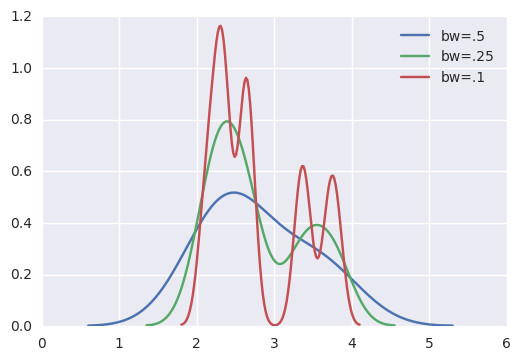

In [68]:
sns.kdeplot(data, bw=.1, label='bw=.1')
sns.kdeplot(data, bw=.25, label='bw=.25')
sns.kdeplot(data, bw=.5, label='bw=.5')

So how do we choose the optimal bandwidth? A common way is the use the bandwidth that minimizes the optimality criterion (which is a function of the optimal bandwidth), calculated using MISE = Mean Integrated Squared Error: 

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e82f5bf5bca33817b7f78ebb252afa6836b6e4c7)

Or, we use the AMISE = Asymptotic Mean Integrated Squared Error so then optimal bandwidth = argmin AMISE i.e. the optimal bandwidth is the argument that minimises the AMISE.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/36165e9c0691db5d4a6566f698b6d215b8b87ebd)

In general, the AMISE still depends on the true underlying density (which of course we don't have!) and so we need to estimate the AMISE from our data as well. This means that the chosen bandwidth is an estimate of an asymptotic approximation. It now sounds as if it's too far away from the true optimal value but it turns out that this particular choice of bandwidth recovers all the important features whilst maintaining smoothness.

## References

- https://en.wikipedia.org/wiki/Kernel_density_estimation
- http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/
- http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/AV0405/MISHRA/kde.html